In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
with open("paths.yaml", "r") as f:
    paths = yaml.safe_load(f)

In [3]:
df_att = paths["datasets"]["attributes"]
df_plab = paths["datasets"]["potential_labels"]

df_att = pd.read_csv(df_att, sep=';')
df_plab = pd.read_csv(df_plab, sep=';')

df_att.columns = [col.upper() for col in df_att.columns]
df_plab.columns = [col.upper() for col in df_plab.columns]

In [4]:
df_att.head()

,TASK_RESPONSE_ID,MATCH_ID,EVALUATOR_ID,PLAYER_ID,POSITION_ID,ANALYSIS_ID,ATTRIBUTE_ID,ATTRIBUTE_VALUE
0,4915,62935,177676,1361061,2,12818495,4322,56.0
1,4915,62935,177676,1361061,2,12818495,4323,56.0
2,4915,62935,177676,1361061,2,12818495,4324,67.0
3,4915,62935,177676,1361061,2,12818495,4325,56.0
4,4915,62935,177676,1361061,2,12818495,4326,45.0


In [5]:
df_plab.head()

,TASK_RESPONSE_ID,MATCH_ID,EVALUATOR_ID,PLAYER_ID,POTENTIAL_LABEL
0,4915,62935,177676,1361061,average
1,4915,62935,177676,1361626,highlighted
2,4915,62935,177676,1361858,average
3,4915,62935,177676,1362220,highlighted
4,4915,62935,177676,1364951,highlighted


In [6]:
def quick_info(dataframe):
    print("--------- SHAPE ---------")
    print(dataframe.shape)
    print("--------- COLUMNS ---------")
    print(dataframe.columns)
    print("--------- INFO ---------")
    print(dataframe.info())
    print("--------- FREQUENCY ---------")
    print(dataframe.nunique())
    print("--------- ANY NULL VALUES ---------")
    print(dataframe.isnull().values.any())
    print("--------- SUM OF NULL VALUES ---------")
    print(dataframe.isnull().sum().T)
    print("--------- DESCRIBE ---------")
    print(dataframe.describe())

In [7]:
print("### Attribute ###")
quick_info(df_att)

### Attribute ###
--------- SHAPE ---------
(10730, 8)
--------- COLUMNS ---------
Index(['TASK_RESPONSE_ID', 'MATCH_ID', 'EVALUATOR_ID', 'PLAYER_ID',
       'POSITION_ID', 'ANALYSIS_ID', 'ATTRIBUTE_ID', 'ATTRIBUTE_VALUE'],
      dtype='object')
--------- INFO ---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10730 entries, 0 to 10729
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TASK_RESPONSE_ID  10730 non-null  int64  
 1   MATCH_ID          10730 non-null  int64  
 2   EVALUATOR_ID      10730 non-null  int64  
 3   PLAYER_ID         10730 non-null  int64  
 4   POSITION_ID       10730 non-null  int64  
 5   ANALYSIS_ID       10730 non-null  int64  
 6   ATTRIBUTE_ID      10730 non-null  int64  
 7   ATTRIBUTE_VALUE   10730 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 670.8 KB
None
--------- FREQUENCY ---------
TASK_RESPONSE_ID     29
MATCH_ID             17
EVALUATOR_ID    

In [8]:
print("### Potential Labels ###")
quick_info(df_plab)

### Potential Labels ###
--------- SHAPE ---------
(322, 5)
--------- COLUMNS ---------
Index(['TASK_RESPONSE_ID', 'MATCH_ID', 'EVALUATOR_ID', 'PLAYER_ID',
       'POTENTIAL_LABEL'],
      dtype='object')
--------- INFO ---------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   TASK_RESPONSE_ID  322 non-null    int64 
 1   MATCH_ID          322 non-null    int64 
 2   EVALUATOR_ID      322 non-null    int64 
 3   PLAYER_ID         322 non-null    int64 
 4   POTENTIAL_LABEL   322 non-null    object
dtypes: int64(4), object(1)
memory usage: 12.7+ KB
None
--------- FREQUENCY ---------
TASK_RESPONSE_ID     29
MATCH_ID             17
EVALUATOR_ID         10
PLAYER_ID           277
POTENTIAL_LABEL       3
dtype: int64
--------- ANY NULL VALUES ---------
False
--------- SUM OF NULL VALUES ---------
TASK_RESPONSE_ID    0
MATCH_ID            0


In [9]:
def dataframe_summary(dataframe, cat_threshold = 1, card_threshold=3):
    #Categorical Variables
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["object"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_threshold and dataframe[col].dtypes in ["int", "float"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > card_threshold and str(dataframe[col].dtypes) in ["object"]]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    #Numerical Variables
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ['int', 'float']]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}\n",
          f"Variables: {dataframe.shape[1]}\n",
          f'cat_cols: {len(cat_cols)}\n{cat_cols}\n',
          f'num_cols: {len(num_cols)}\n{num_cols}\n',
          f'cat_but_car: {len(cat_but_car)}\n{cat_but_car}\n',
          f'num_but_cat: {len(num_but_cat)}\n{num_but_cat}')

    return cat_cols, num_cols, cat_but_car


In [10]:
cat_cols, num_cols, cat_but_car= dataframe_summary(dataframe=df_att)

Observations: 10730
 Variables: 8
 cat_cols: 0
[]
 num_cols: 8
['TASK_RESPONSE_ID', 'MATCH_ID', 'EVALUATOR_ID', 'PLAYER_ID', 'POSITION_ID', 'ANALYSIS_ID', 'ATTRIBUTE_ID', 'ATTRIBUTE_VALUE']
 cat_but_car: 0
[]
 num_but_cat: 0
[]


In [11]:
plab_cat_cols, plab_num_cols, plab_cat_but_car= dataframe_summary(dataframe=df_plab)

Observations: 322
 Variables: 5
 cat_cols: 1
['POTENTIAL_LABEL']
 num_cols: 4
['TASK_RESPONSE_ID', 'MATCH_ID', 'EVALUATOR_ID', 'PLAYER_ID']
 cat_but_car: 0
[]
 num_but_cat: 0
[]


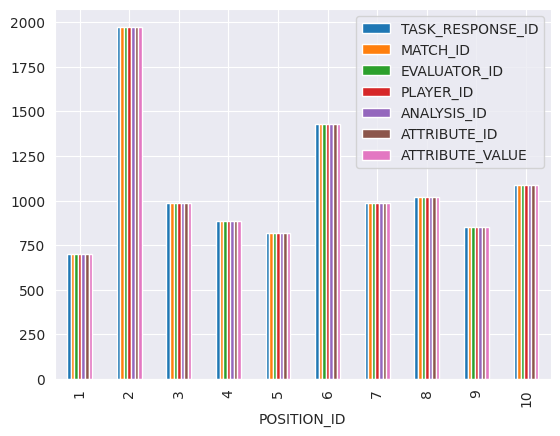

In [12]:
df_att.groupby('POSITION_ID').count().plot(kind="bar")
plt.show()

<Axes: xlabel='POSITION_ID'>

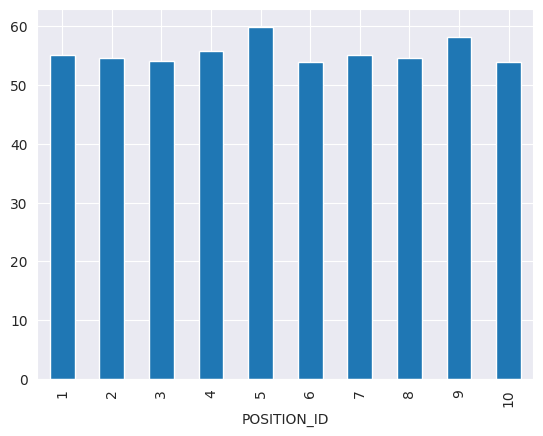

In [13]:
df_att.groupby('POSITION_ID')['ATTRIBUTE_VALUE'].mean().plot(kind="bar")

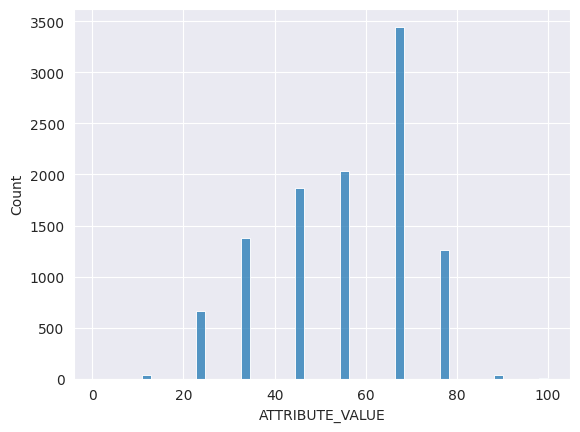

In [14]:
sns.histplot(df_att['ATTRIBUTE_VALUE'])
plt.show()

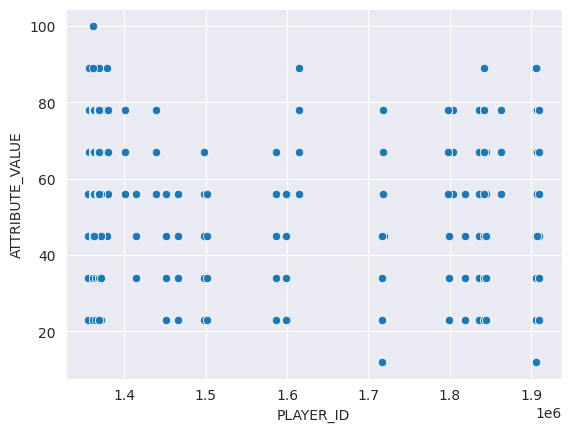

In [15]:
# Get top 100 players based on number of matches played
players_top100 = df_att.groupby('PLAYER_ID').agg({'MATCH_ID':'count'}).sort_values(by='MATCH_ID', ascending=False).head(100).index.tolist()

# Filter data for top 100 players
df_top100 = df_att[df_att['PLAYER_ID'].isin(players_top100)]

# Plot scatterplot for top 100 players
sns.scatterplot(data=df_top100, x='PLAYER_ID', y='ATTRIBUTE_VALUE')
plt.show()

In [16]:
#Top 10 player
df_att.groupby('PLAYER_ID')['EVALUATOR_ID'].count().sort_values(ascending=False).head(10)

PLAYER_ID
1369065    102
1370976    102
1361061    102
1364951    102
1361626    102
1369060     75
1372675     68
1367783     68
1361858     68
1362220     68
Name: EVALUATOR_ID, dtype: int64

In [17]:
#Top 10 evaluator
df_att.groupby('EVALUATOR_ID')['PLAYER_ID'].count().sort_values(ascending=False).head(10)

EVALUATOR_ID
151191    3693
256441    2215
177676    1163
160289     832
132337     798
141254     501
130478     399
135624     399
173255     365
186987     365
Name: PLAYER_ID, dtype: int64

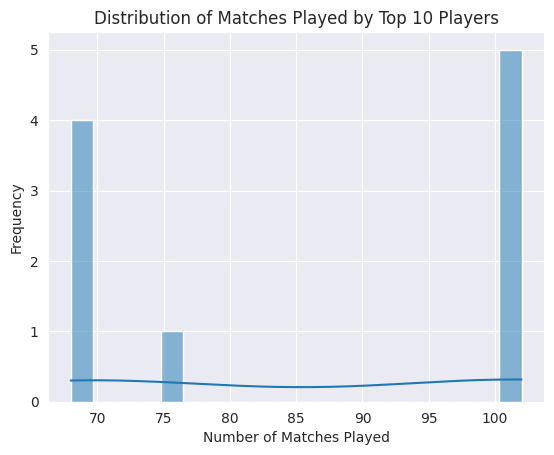

In [18]:
#Distribution of players by match
players_by_match = df_att.groupby('PLAYER_ID').agg({'MATCH_ID':'count'}).sort_values(by='MATCH_ID', ascending=False).head(10)
sns.histplot(players_by_match['MATCH_ID'], bins=20, kde=True)
plt.xlabel("Number of Matches Played")
plt.ylabel("Frequency")
plt.title("Distribution of Matches Played by Top 10 Players")
plt.show()


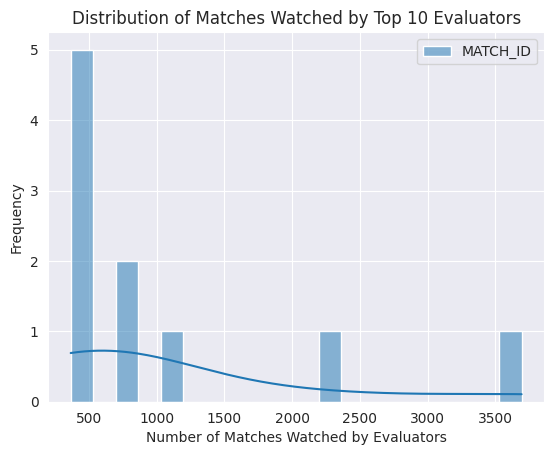

In [19]:
#Distribution of evaluators by match
evaluators_by_match = df_att.groupby('EVALUATOR_ID').agg({'MATCH_ID':'count'}).sort_values(by='MATCH_ID', ascending=False).head(10)
sns.histplot(evaluators_by_match, bins=20, kde=True)
plt.xlabel("Number of Matches Watched by Evaluators")
plt.ylabel("Frequency")
plt.title("Distribution of Matches Watched by Top 10 Evaluators")
plt.show()

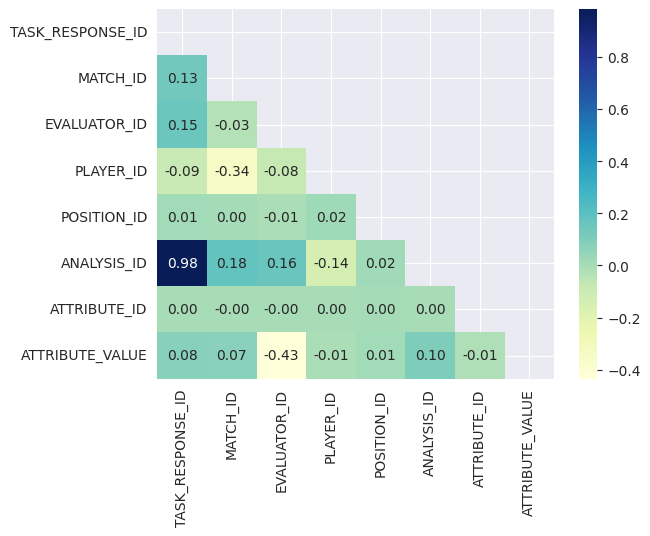

In [20]:
# Compute the correlation matrix
corr_ = df_att.corr()

mask = np.triu(np.ones_like(corr_.corr()))

# Create a heatmap
sns.heatmap(corr_, cmap="YlGnBu", annot=True, mask=mask, fmt='.2f')

# Show the plot
plt.show()

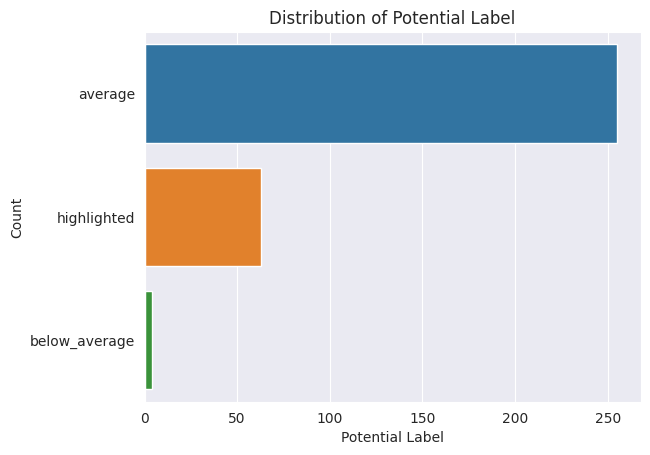

In [21]:
sns.countplot(data=df_plab, y='POTENTIAL_LABEL')
plt.xlabel("Potential Label")
plt.ylabel("Count")
plt.title("Distribution of Potential Label")
plt.show()

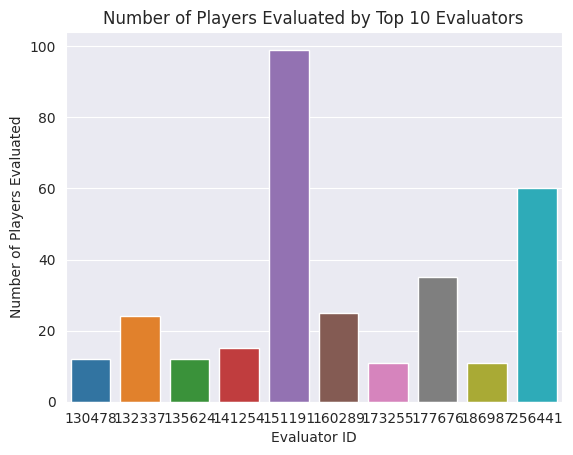

In [22]:
evaluator_counts = df_plab.groupby('EVALUATOR_ID')['PLAYER_ID'].nunique().sort_values(ascending=False)
sns.barplot(x=evaluator_counts.index[:10], y=evaluator_counts.values[:10])
plt.xlabel("Evaluator ID")
plt.ylabel("Number of Players Evaluated")
plt.title("Number of Players Evaluated by Top 10 Evaluators")
plt.show()


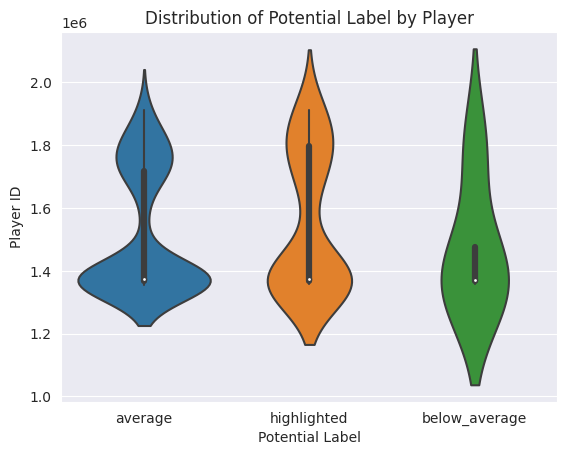

In [23]:
sns.violinplot(data=df_plab, x='POTENTIAL_LABEL', y='PLAYER_ID')
plt.xlabel("Potential Label")
plt.ylabel("Player ID")
plt.title("Distribution of Potential Label by Player")
plt.show()


In [24]:
df_plab.groupby("POTENTIAL_LABEL").count()

,TASK_RESPONSE_ID,MATCH_ID,EVALUATOR_ID,PLAYER_ID
POTENTIAL_LABEL,,,,
average,255,255,255,255
below_average,4,4,4,4
highlighted,63,63,63,63


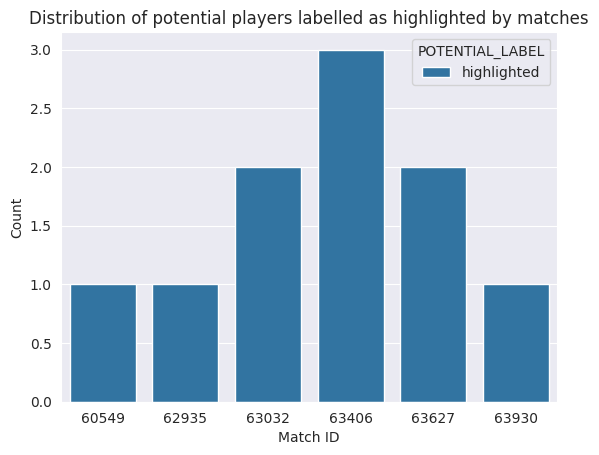

In [25]:
# Filter the dataframe to include only the 'highlighted' class and select the top 10 rows
df_pot_highlighted = df_plab[df_plab['POTENTIAL_LABEL'] == 'highlighted'].sort_values(by='POTENTIAL_LABEL',ascending=False).head(10)

# Create the countplot
sns.countplot(data=df_pot_highlighted, x='MATCH_ID', hue='POTENTIAL_LABEL')
plt.xlabel("Match ID")
plt.ylabel("Count")
plt.title("Distribution of potential players labelled as highlighted by matches")
plt.show()

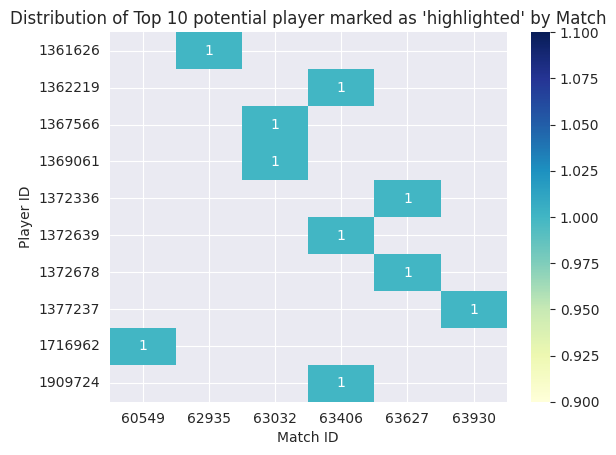

In [26]:
# Filter the dataframe to include only the 'highlighted' class and select the top 10 rows
#df_pot_highlighted = df_plab[df_plab['POTENTIAL_LABEL'] == 'highlighted'].sort_values(by='POTENTIAL_LABEL', ascending=False).head(10)

# Pivot the dataframe to create a matrix of counts for each combination of player and match
df_heatmap = df_pot_highlighted.pivot_table(index='PLAYER_ID', columns='MATCH_ID', values='POTENTIAL_LABEL', aggfunc='count')

# Create the heatmap
sns.heatmap(df_heatmap, annot=True, cmap='YlGnBu')
plt.xlabel("Match ID")
plt.ylabel("Player ID")
plt.title("Distribution of Top 10 potential player marked as 'highlighted' by Match")
plt.show()


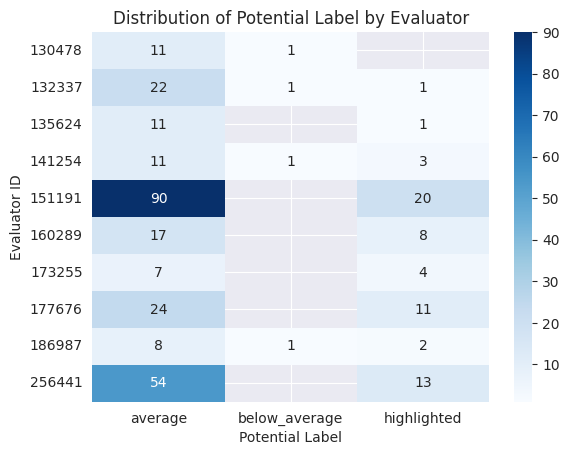

In [27]:
# Create a pivot table with count of player IDs by evaluator ID and potential label
eval_potential_counts = df_plab.pivot_table(index='EVALUATOR_ID', columns='POTENTIAL_LABEL', values='PLAYER_ID', aggfunc='count')

# Create the heatmap
sns.heatmap(eval_potential_counts, cmap='Blues', annot=True)
plt.xlabel("Potential Label")
plt.ylabel("Evaluator ID")
plt.title("Distribution of Potential Label by Evaluator")
plt.show()